In [3]:
import numpy as np
from scipy.special import gammaln
from deeptime.markov.msm import MarkovStateModel, MaximumLikelihoodMSM
from deeptime.data import prinz_potential
from deeptime.clustering import KMeans
import BACE_p3
from deeptime.markov import TransitionCountEstimator
import matplotlib.pyplot as plt

# Generate data from the Prinz potential
data = prinz_potential().trajectory(np.zeros((10, 1)), 2000)
traj = np.concatenate(data)

# Perform k-means clustering to discretize the trajectory
n_clusters = 50  # Number of clusters for k-means
kmeans = KMeans(n_clusters=n_clusters)
clustering = kmeans.fit(traj)
cluster_labels = clustering.transform(traj)

# Estimate the transition count matrix
estimator = TransitionCountEstimator(lagtime=1, count_mode='sliding')
count_matrix = estimator.fit(cluster_labels)
# Create the MSM
msm = MaximumLikelihoodMSM(lagtime=1).fit(count_matrix).fetch_model()

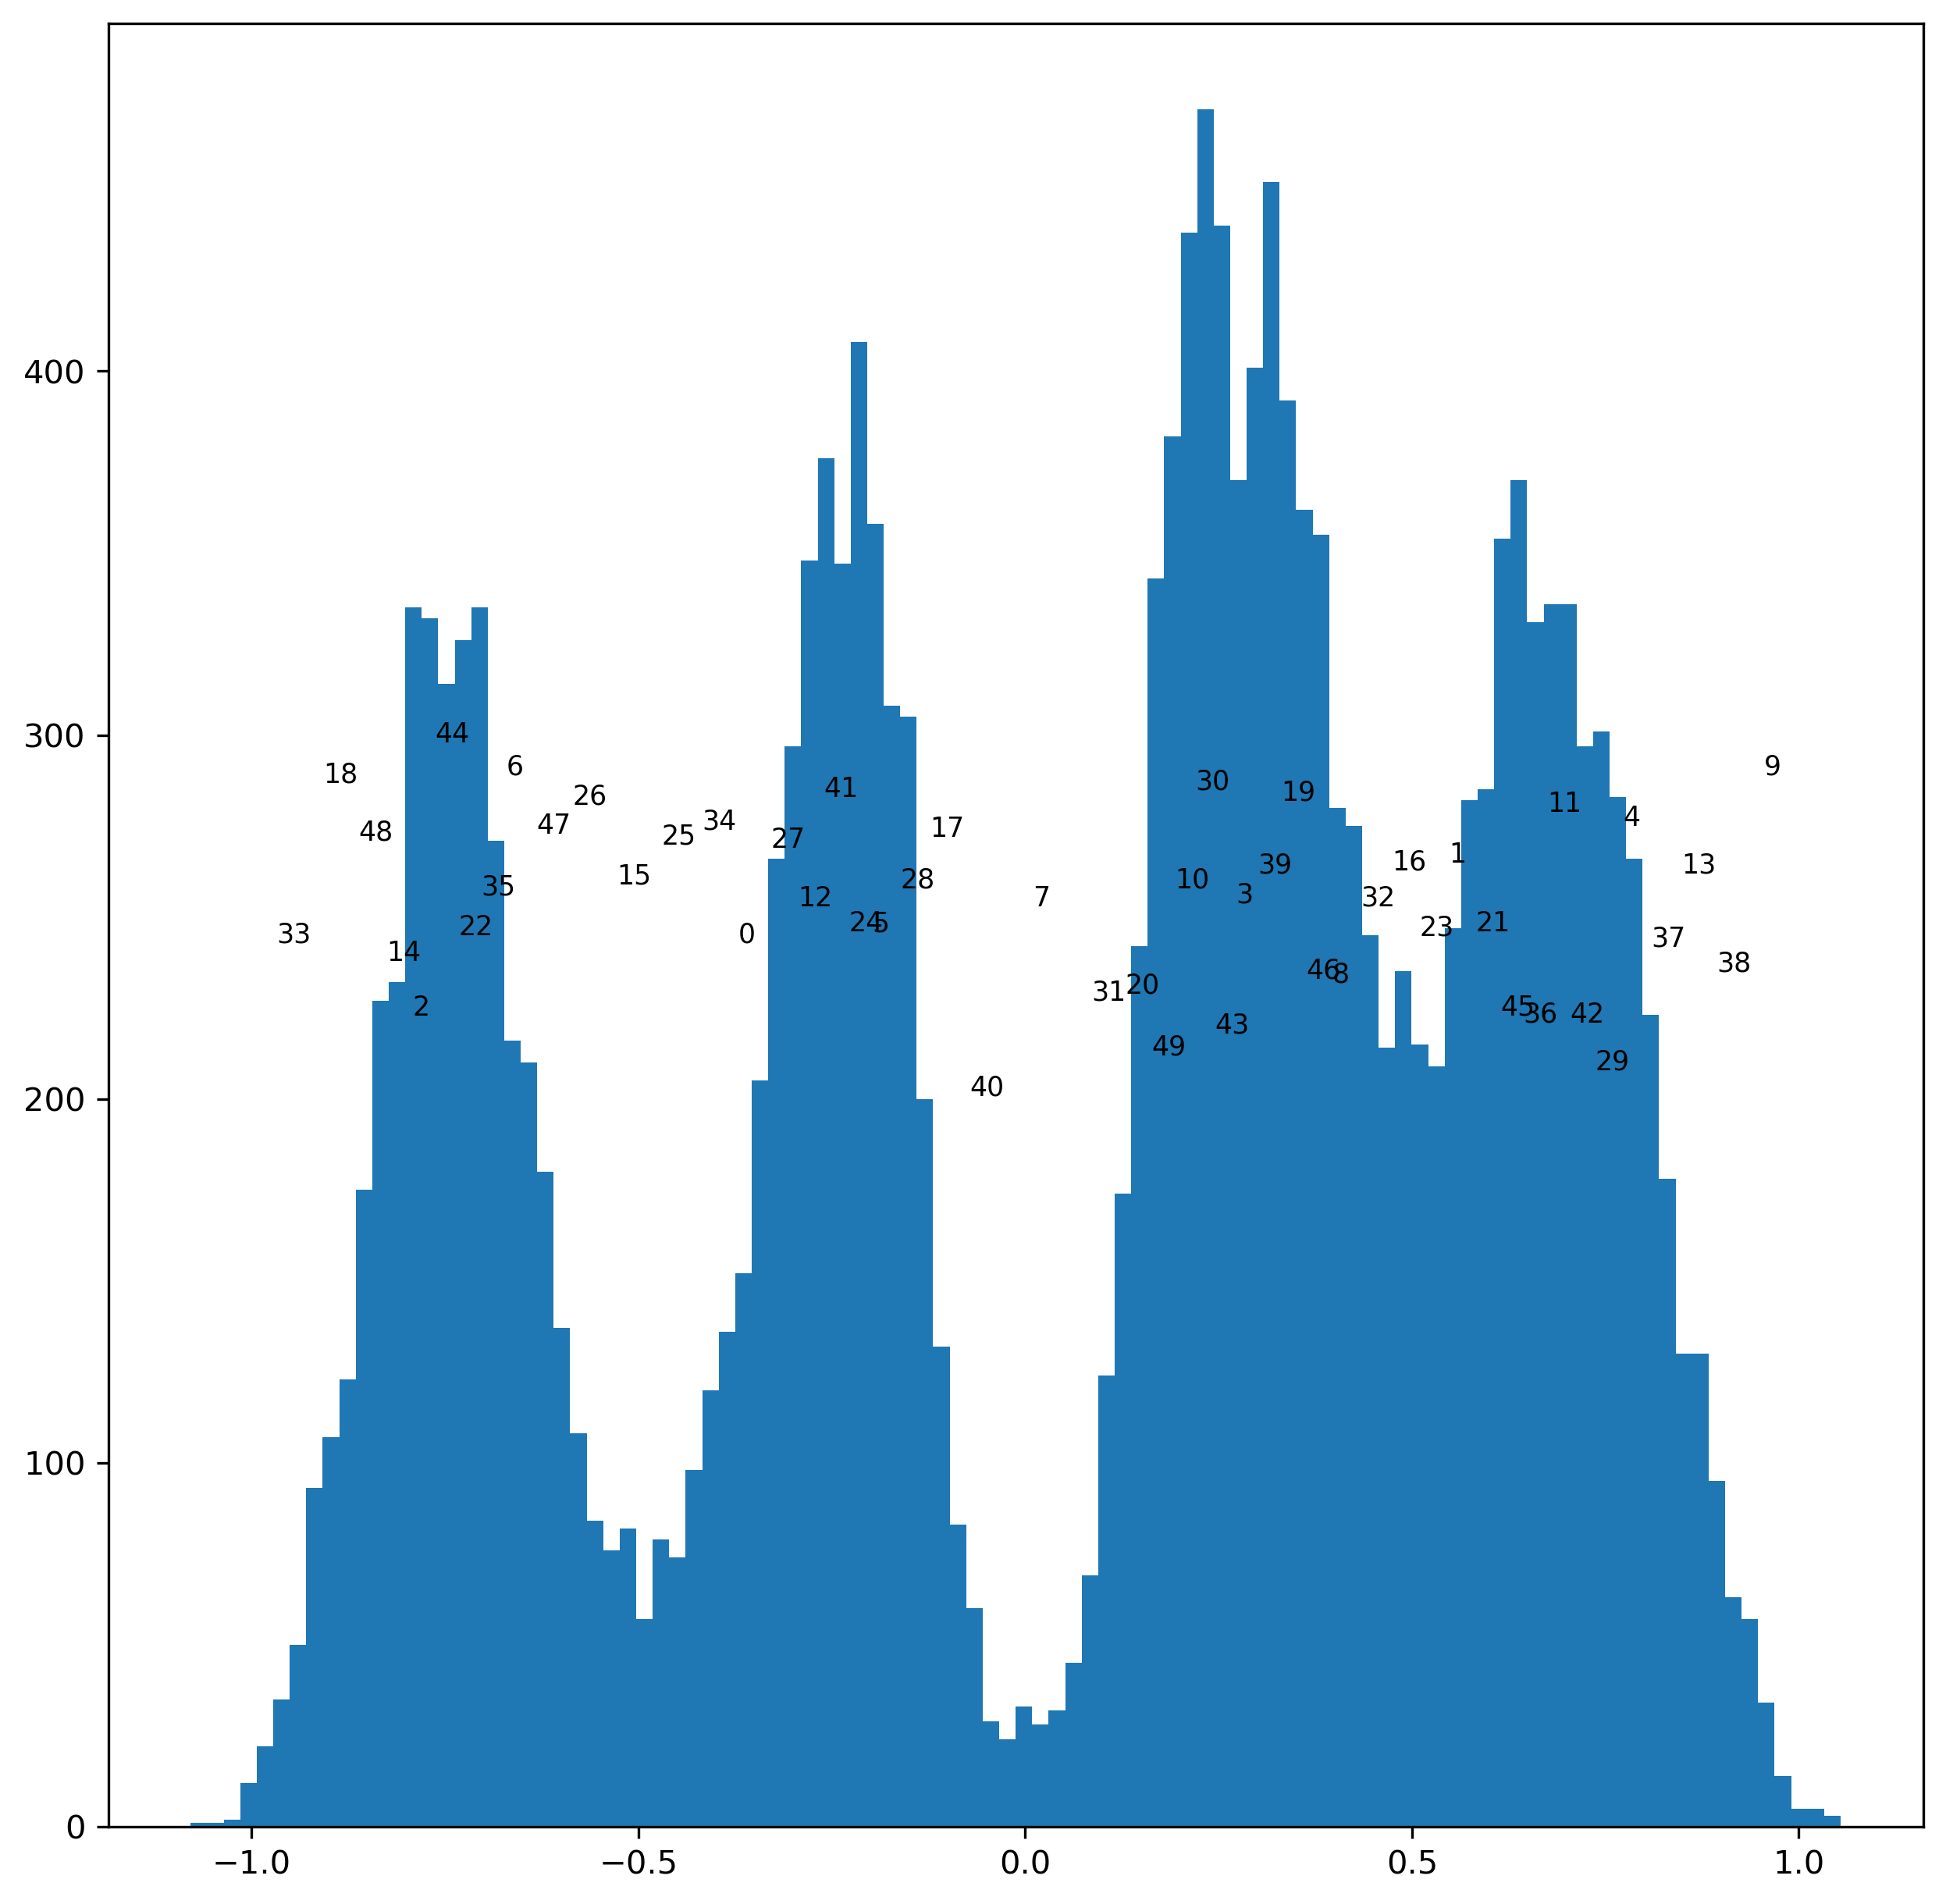

In [4]:
fig,ax = plt.subplots(dpi=300,figsize=(10,10))
cluster_centers = clustering.fetch_model().cluster_centers
ax.hist(traj,bins=100)
for i,x in enumerate(cluster_centers):
    ax.annotate(i,(x,200+np.random.randint(100)),fontsize='small')

In [5]:
# Setting up arguments
class Args:
    tCountFn = msm.count_model.count_matrix
    nMacro = 5
    nProc = 10
    forceDense = False
    outDir = 'Output_BACE'

args = Args()
BACE_p3.bace_main(args)

--------------------------------------------------------------------------------
BACE version 1.0

Written by Gregory R. Bowman, UC Berkeley

--------------------------------------------------------------------------------
Copyright 2012 University of California, Berkeley.

BACE comes with ABSOLUTELY NO WARRANTY.

BACE is free software; you can redistribute it and/or
modify it under the terms of the GNU General Public License
as published by the Free Software Foundation; either version 2
of the License, or (at your option) any later version.

--------------------------------------------------------------------------------
Please cite:
GR Bowman. Improved coarse-graining of Markov state models via explicit consideration of statistical uncertainty. J Chem Phys 2012;137;134111.

Currently available as arXiv:1201.3867 2012.

--------------------------------------------------------------------------------

10:58:00 - Set number of processors to 10
10:58:00 - Checking for states with insuffi

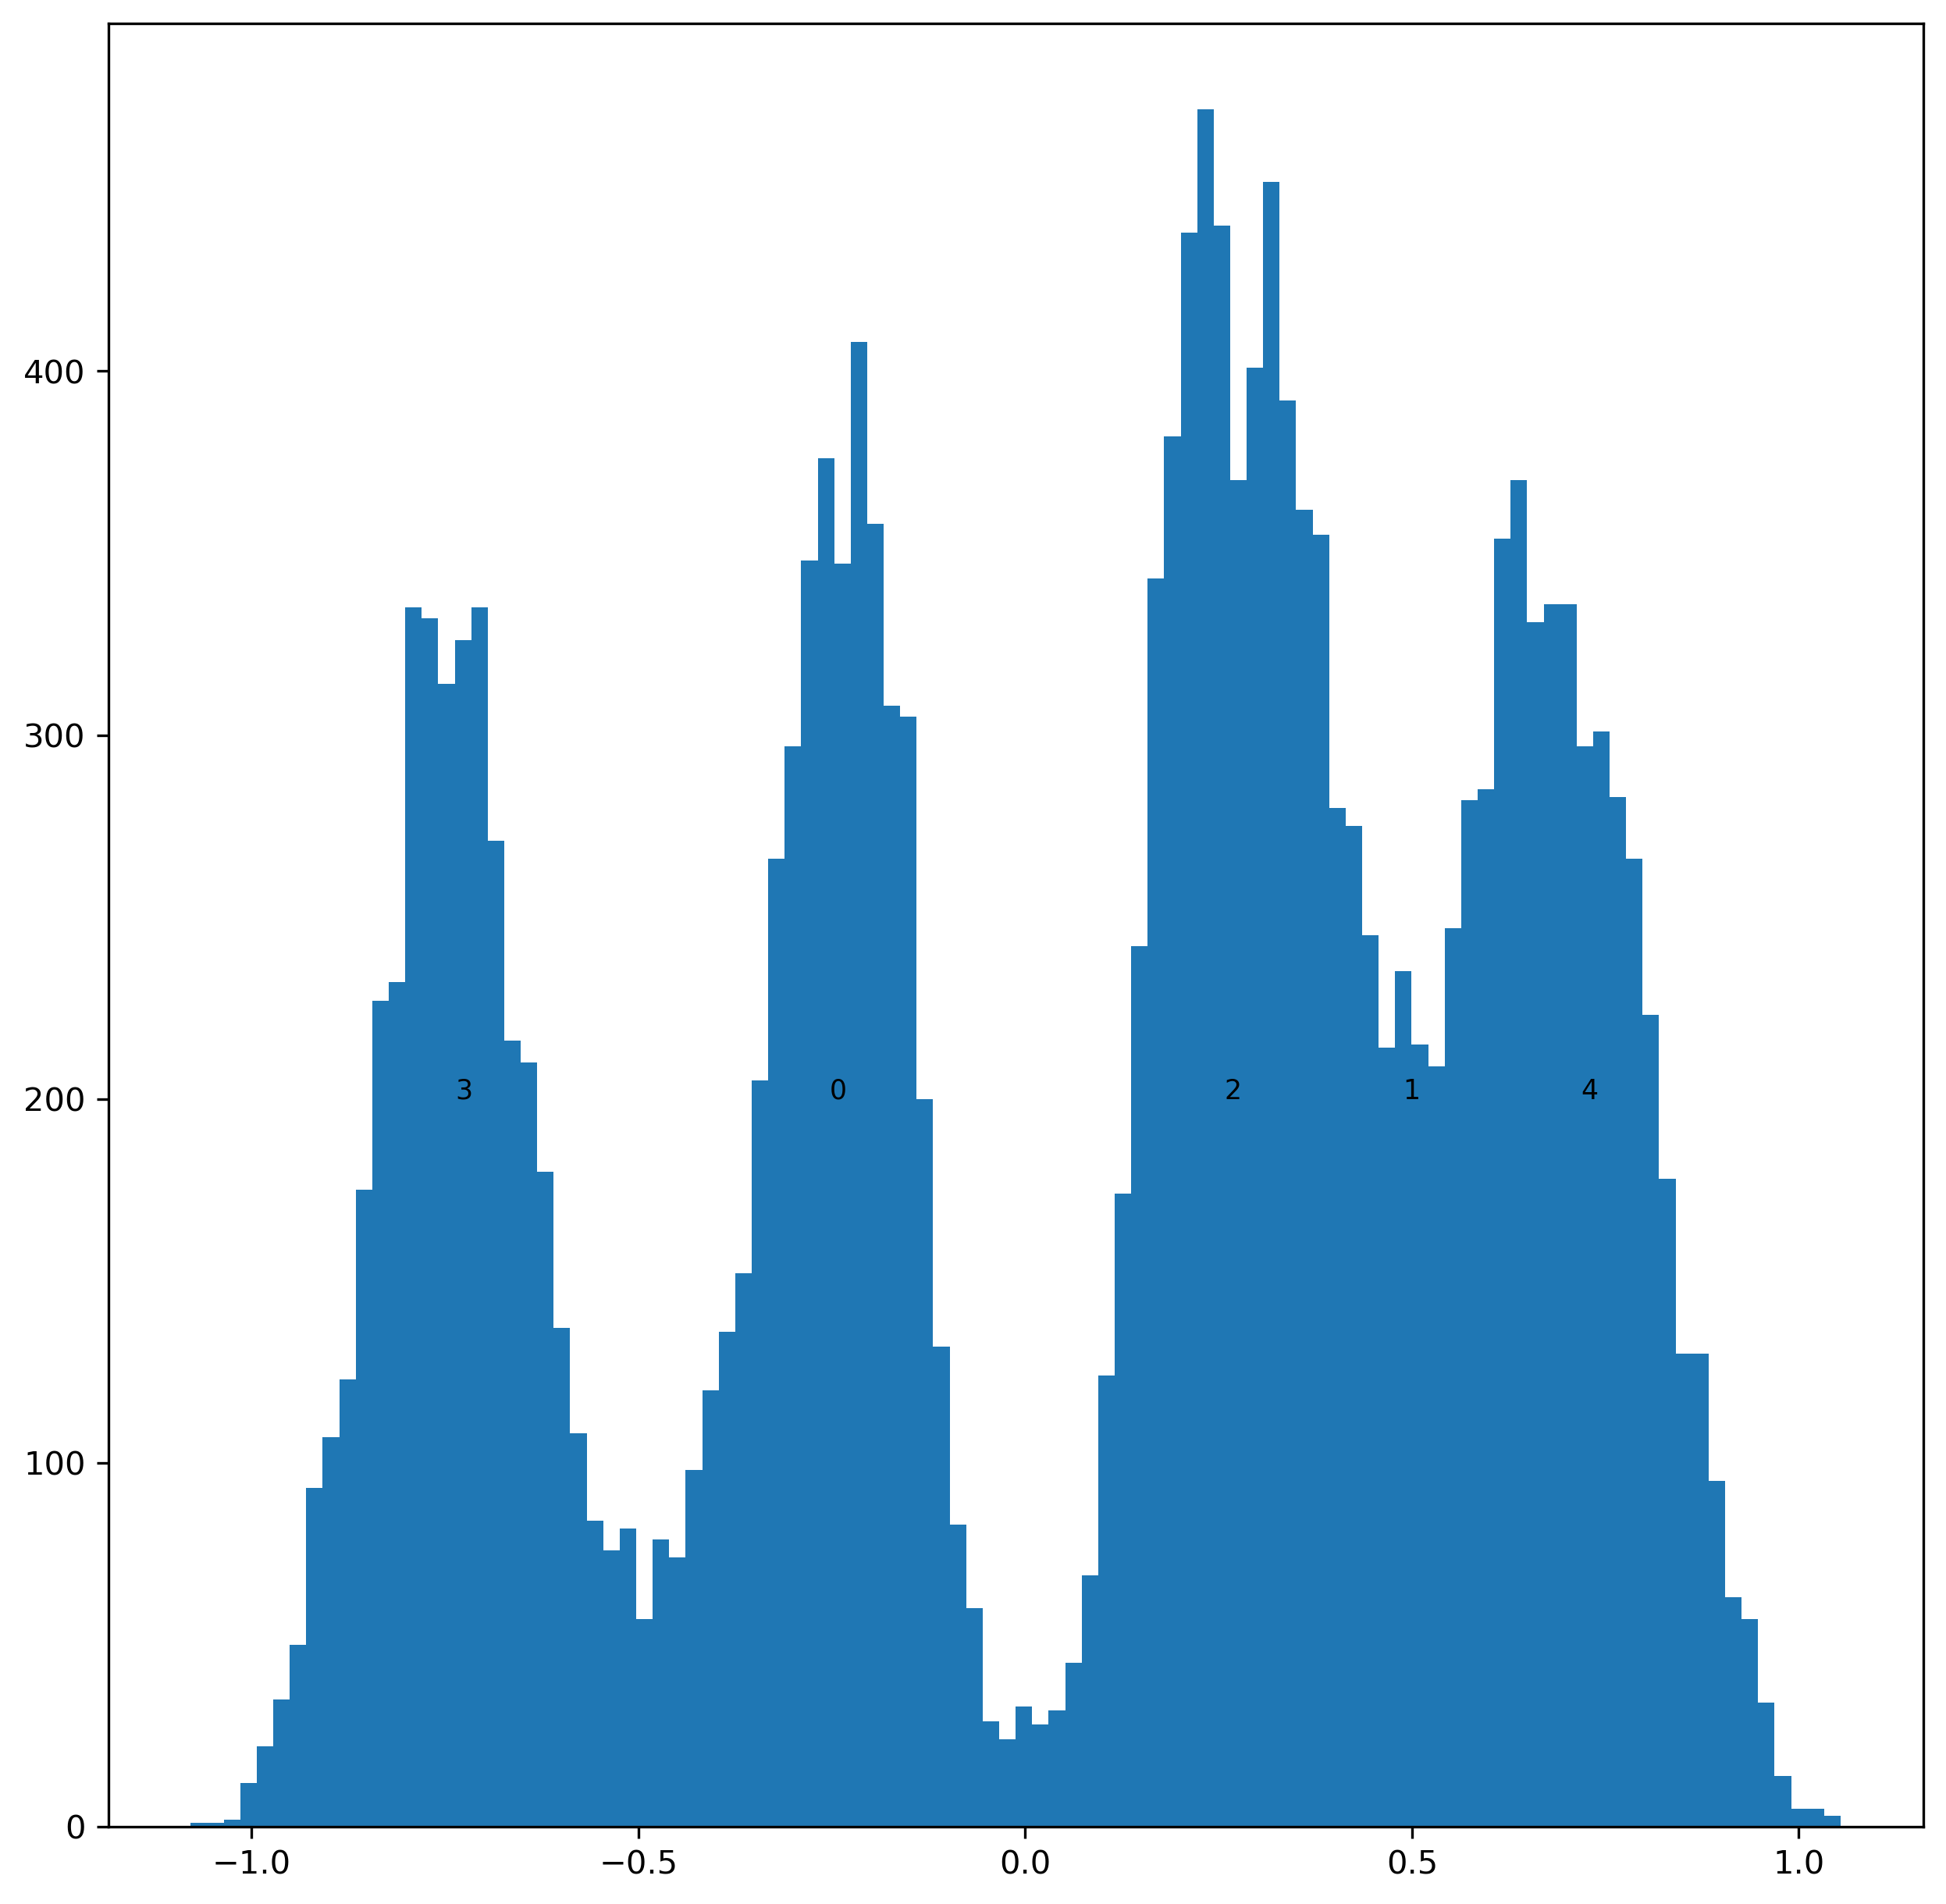

In [20]:
coarse_grained_msm = BACE_p3.coarse_grain_msm(msm, 'Output_BACE/map5.dat')
cluster_centers = clustering.fetch_model().cluster_centers
populations = msm.stationary_distribution
mapping = np.loadtxt('Output_BACE/map5.dat', dtype=int)
coarse_centers, coarse_populations = BACE_p3.calculate_coarse_grained_centers(cluster_centers, populations, mapping)
fig,ax = plt.subplots(dpi=300,figsize=(10,10))
ax.hist(traj,bins=100)
for i,x in enumerate(coarse_centers):
    ax.annotate(i,(x,200),fontsize='small')